## Messy Code File
###### *Caleb Davis*

#### **Getting the Data:**
To work with the Riot api, we will be using a Python framwework called pantheon.

In [6]:
myKey = "xxxxx-xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxx"

In [51]:
'''
import cassiopeia as cass



cass.set_riot_api_key(myKey)  # This overrides the value set in your configuration/settings.
cass.set_default_region("NA")


champions = Champions(region="NA")
champion_id_to_name_mapping = {champion.id: champion.name for champion in cass.get_champions(region='NA')}
'''

Before attempting to retrieve a large amount of data, I'll practice with cassiopeia to see what it can do.

In [ ]:
'''
summoner = Summoner(name="mellokey", region="NA")
print("{name} is a level {level} summoner on the {region} server.".format(name=summoner.name, level=summoner.level, region=summoner.region))

matchHist = summoner.match_history()
matchHist(seasons={Season.season_9}, queues={Queue.ranked_solo_fives})
matchArr = []

played_champions = Counter()


i = 0
for match in matchHist:
    if i > 50:
        break
    
    if(match.mode and match.mode==cass.GameMode.classic):
        matchArr.append({})
        matchArr[i]["id"] = match.id
        matchArr[i]["blue_team"] = match.blue_team
        matchArr[i]["red_team"] = match.red_team
        matchArr[i]["is_red"] = True
        for participant in match.blue_team.participants:
            if(participant.summoner == summoner):
                matchArr[i]["is_red"] = False
                matchArr[i]["champ"] = participant.champion.id
        
        for participant in match.red_team.participants:
            if(participant.summoner == summoner):
                matchArr[i]["champ"] = participant.champion.id
                
        i+=1
    #print(match.participants[summoner.name].champion.id)
    #matchArr.append({})
    #champion_id = match.participants[summoner.name].champion.id
    #champion_name = champion_id_to_name_mapping[champion_id]
    #played_champions[champion_name] += 1
    #matchArr[i]["bans"] = match.bans
    #matchArr[i]["baron_kills"] = match.baron_kills
    
    #...
    
#for match in matchArr:
#    print("ID: " + str(match["id"]) + ", champ: " + str(match["champ"]))
    
    
#vayneGames = matchHist.search("Vayne")
#gameDict = jaxGame.toDict()
#for key in gameDict.keys():
#    print(key + " : " + gameDict[key])
'''

Cassiopeia seemed like it was a really great library, but it was outdated and a lot of the classes were't fully implemented, making it difficult to retrieve data.

So, I tried another community made python framework called pantheon:

In [10]:
'''
from pantheon import pantheon
import asyncio

server = "na1"
'''

In [ ]:
'''
def requestsLog(url, status, headers):
    print(url)
    print(status)
    print(headers)

server = "NA"
panth = pantheon.Pantheon(server, myKey, errorHandling=True, requestsLoggingFunction=requestsLog, debug=True)

async def getSummonerId(name):
    try:
        data = await panth.getSummonerByName(name)
        return (data['id'],data['accountId'])
    except Exception as e:
        print(e)
async def getRecentMatchlist(accountId):
    try:
        data = await panth.getMatchlist(accountId, params={"endIndex":10})
        return data
    except Exception as e:
        print(e)

async def getRecentMatches(accountId):
    try:
        matchlist = await getRecentMatchlist(accountId)
        tasks = [panth.getMatch(match['gameId']) for match in matchlist['matches']]
        return await asyncio.gather(*tasks)
    except Exception as e:
        print(e)
        
name = "xKhaleeb"

loop = asyncio.get_event_loop()  

(summonerId, accountId) = loop.run_until_complete(getSummonerId(name))
print(summonerId)
print(accountId)
print(loop.run_until_complete(getRecentMatches(accountId)))
'''

I had even less success with this framework, as I couldn't even get the json request handler loop to work properly. I decided I'd save the feature of getting specific user data generated from players in previous matches for a later data and start working with some sample data of different elos I found online.

Optimally at some point I'd like to user the Riot api to find matches in a specific players elo based on the match history of players from previous matches with the same elo. This seems very possible with the api.

[sample data](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)

In [1]:
import pandas as pd
import csv

highEloGames = pd.read_csv('data/high_diamond_ranked_10min.csv')
highEloGames.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Lets look at the values we have to work with:

In [2]:
for c in highEloGames.columns: print(c + ";  Example: " + str(highEloGames[c][0]) )

gameId;  Example: 4519157822
blueWins;  Example: 0
blueWardsPlaced;  Example: 28
blueWardsDestroyed;  Example: 2
blueFirstBlood;  Example: 1
blueKills;  Example: 9
blueDeaths;  Example: 6
blueAssists;  Example: 11
blueEliteMonsters;  Example: 0
blueDragons;  Example: 0
blueHeralds;  Example: 0
blueTowersDestroyed;  Example: 0
blueTotalGold;  Example: 17210
blueAvgLevel;  Example: 6.6
blueTotalExperience;  Example: 17039
blueTotalMinionsKilled;  Example: 195
blueTotalJungleMinionsKilled;  Example: 36
blueGoldDiff;  Example: 643
blueExperienceDiff;  Example: -8
blueCSPerMin;  Example: 19.5
blueGoldPerMin;  Example: 1721.0
redWardsPlaced;  Example: 15
redWardsDestroyed;  Example: 6
redFirstBlood;  Example: 0
redKills;  Example: 6
redDeaths;  Example: 9
redAssists;  Example: 8
redEliteMonsters;  Example: 0
redDragons;  Example: 0
redHeralds;  Example: 0
redTowersDestroyed;  Example: 0
redTotalGold;  Example: 16567
redAvgLevel;  Example: 6.8
redTotalExperience;  Example: 17047
redTotalMinio

## **Plots**
 
Let's see what visualizations we can make from this
#### Comparing gold between winning and losing teams ten minutes in:

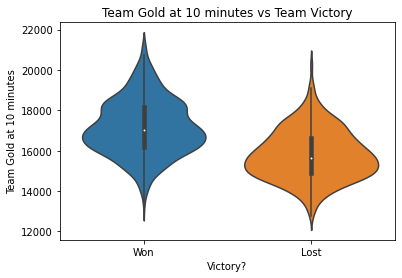

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

blueTeamWins = highEloGames.loc[highEloGames['blueWins'] == 1]
redTeamWins = highEloGames.loc[highEloGames['blueWins'] == 0]

blueTeamWins = blueTeamWins.head(300)
redTeamWins = redTeamWins.head(300)
goldData = {"Team Gold at 10 minutes" : [], "Victory?" : []}


for row in blueTeamWins["blueTotalGold"]:
    goldData["Team Gold at 10 minutes"].append(row)
    goldData["Victory?"].append("Won")
for row in blueTeamWins["redTotalGold"]:
    goldData["Team Gold at 10 minutes"].append(row)
    goldData["Victory?"].append("Lost")
for row in redTeamWins["redTotalGold"]:
    goldData["Team Gold at 10 minutes"].append(row)
    goldData["Victory?"].append("Won")
for row in redTeamWins["blueTotalGold"]:
    goldData["Team Gold at 10 minutes"].append(row)
    goldData["Victory?"].append("Lost")

sns.violinplot(x="Victory?", y="Team Gold at 10 minutes", data=pd.DataFrame(data=goldData))
plt.title("Team Gold at 10 minutes vs Team Victory")
plt.show()

As expected, teams with a higher gold at 10 minutes are more likely to win, however there is more to see in the shape of the violin plot. The median Team Gold for winning teams and losing teams is only ~2000 gold apart.++